In [1]:
import pandas as pd
import numpy as np
# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score , mean_squared_error

In [3]:
adult = pd.read_csv(r"C:\Users\DELL\Documents\SushreeM\adult\adult.data",header=None)
adult

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
adult.columns = ['age','workclass','fnlwgt','education','education-num','maratial_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
adult

,age,workclass,fnlwgt,education,education-num,maratial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   education-num    32561 non-null  int64 
 5   maratial_status  32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   sex              32561 non-null  object
 10  capital_gain     32561 non-null  int64 
 11  capital_loss     32561 non-null  int64 
 12  hours_per_week   32561 non-null  int64 
 13  native_country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
adult.describe()

,age,fnlwgt,education-num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
adult.head(5)

,age,workclass,fnlwgt,education,education-num,maratial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
adult.tail(5)

,age,workclass,fnlwgt,education,education-num,maratial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [15]:
adult.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
education-num      0
maratial_status    0
occupation         0
relationship       0
race               0
sex                0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

In [17]:
for i in adult:
    print(i, adult[i]==' ?')

age 0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: age, Length: 32561, dtype: bool
workclass 0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: workclass, Length: 32561, dtype: bool
fnlwgt 0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: fnlwgt, Length: 32561, dtype: bool
education 0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education, Length: 32561, dtype: bool
education-num 0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558   

In [19]:
for i in adult:
    print(i, '=', sum(adult[i]==' ?'))

age = 0
workclass = 1836
fnlwgt = 0
education = 0
education-num = 0
maratial_status = 0
occupation = 1843
relationship = 0
race = 0
sex = 0
capital_gain = 0
capital_loss = 0
hours_per_week = 0
native_country = 583
income = 0


In [21]:
adult.workclass.describe()

count        32561
unique           9
top        Private
freq         22696
Name: workclass, dtype: object

In [23]:
adult.occupation.describe()

count               32561
unique                 15
top        Prof-specialty
freq                 4140
Name: occupation, dtype: object

In [25]:
adult.native_country.describe()

count              32561
unique                42
top        United-States
freq               29170
Name: native_country, dtype: object

In [27]:
adult.workclass = adult.workclass.replace(' ?',' private')
adult.occupation = adult.occupation.replace(' ?',' prof-speciality')
adult.native_country = adult.native_country.replace(' ?',' United-States')

In [29]:
for i in adult:
    print(i, '=', sum(adult[i]==' ?'))

age = 0
workclass = 0
fnlwgt = 0
education = 0
education-num = 0
maratial_status = 0
occupation = 0
relationship = 0
race = 0
sex = 0
capital_gain = 0
capital_loss = 0
hours_per_week = 0
native_country = 0
income = 0


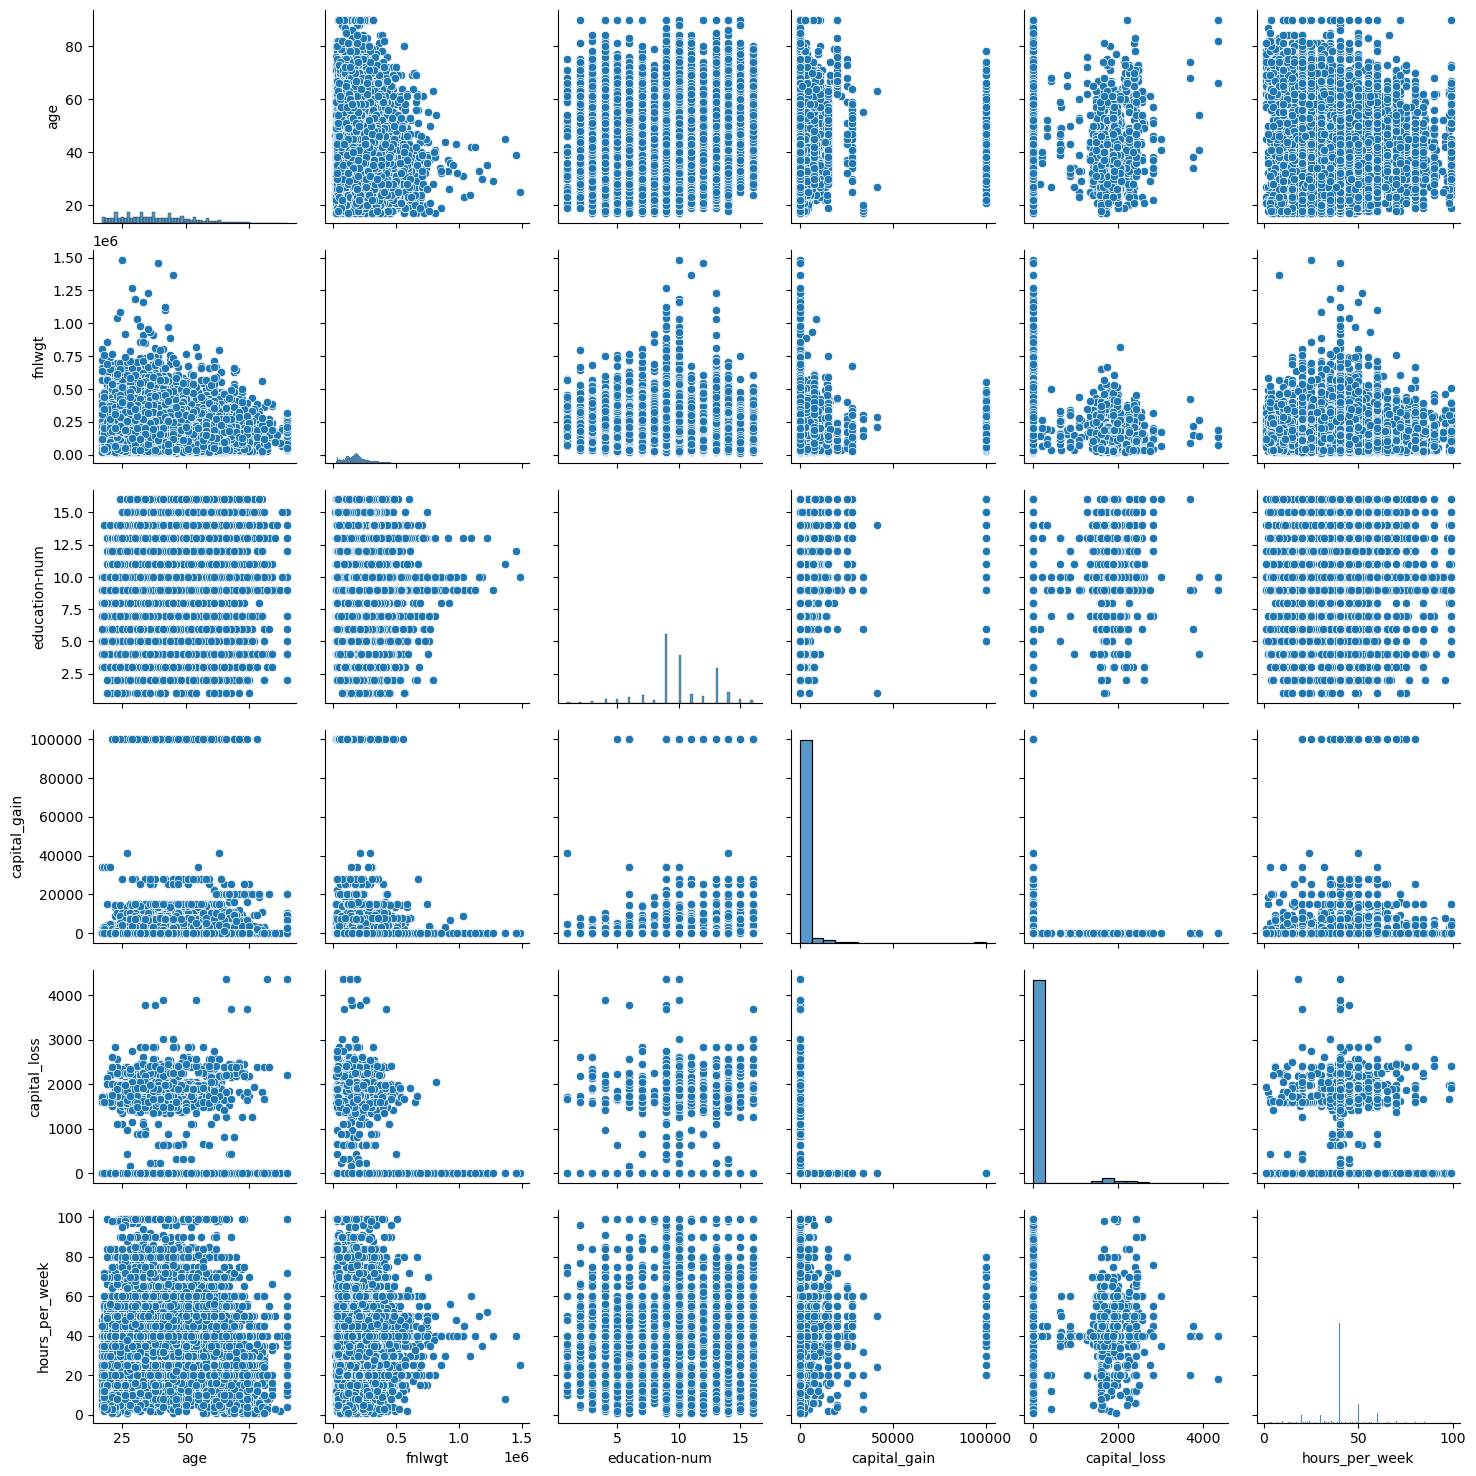

In [31]:
sns.pairplot(adult)
plt.show()

In [33]:
for i in adult:
    print(i,'=',adult[i].unique())

age = [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass = [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' private' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt = [ 77516  83311 215646 ...  34066  84661 257302]
education = [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num = [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
maratial_status = [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation = [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
adult.workclass = le.fit_transform(adult.workclass)

In [39]:
adult.workclass.unique()

array([6, 5, 3, 0, 1, 8, 4, 7, 2])

In [41]:
adult.education = le.fit_transform(adult.education)

In [43]:
adult.education.unique()

array([ 9, 11,  1, 12,  6, 15,  7,  8,  5, 10, 14,  4,  0,  3, 13,  2])

In [51]:
adult.maratial_status = le.fit_transform(adult.maratial_status	)
adult.maratial_status.unique()

array([4, 2, 0, 3, 5, 1, 6], dtype=int64)

In [55]:
adult.occupation = le.fit_transform(adult.occupation)
adult.occupation.unique()

array([ 0,  3,  5,  9,  7, 11,  2, 13,  4,  6, 12, 14, 10,  1,  8],
      dtype=int64)

In [57]:
adult.relationship = le.fit_transform(adult.relationship)
adult.relationship.unique()

array([1, 0, 5, 3, 4, 2])

In [59]:
adult.race = le.fit_transform(adult.race)
adult.race.unique()


array([4, 2, 1, 0, 3])

In [61]:
adult.sex = le.fit_transform(adult.sex)
adult.sex.unique()

array([1, 0])

In [63]:
adult.native_country = le.fit_transform(adult.native_country)
adult.native_country.unique()

array([38,  4, 22, 18, 25, 34, 32, 15,  8,  1, 10, 19, 29, 21, 30,  3,  0,
       36,  6, 24, 35, 13, 31,  5,  7,  9, 12,  2, 23, 40, 28, 27, 33, 37,
       11, 26, 39, 16, 20, 17, 14])

In [65]:
adult.income = le.fit_transform(adult.income)
adult.income.unique()

array([0, 1])

In [67]:
ip = adult.drop(['fnlwgt','income'],axis=1)
op = adult.income

In [69]:
ip, op

(       age  workclass  education  education-num  maratial_status  occupation  \
 0       39          6          9             13                4           0   
 1       50          5          9             13                2           3   
 2       38          3         11              9                0           5   
 3       53          3          1              7                2           5   
 4       28          3          9             13                2           9   
 ...    ...        ...        ...            ...              ...         ...   
 32556   27          3          7             12                2          12   
 32557   40          3         11              9                2           6   
 32558   58          3         11              9                6           0   
 32559   22          3         11              9                4           0   
 32560   52          4         11              9                2           3   
 
        relationship  race

In [222]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(ip,op,train_size=0.6,random_state=1)

In [224]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [226]:
xtrain1 = sc.fit_transform(xtrain)
xtest1 = sc.fit_transform(xtest)

In [227]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()

In [228]:
lgr.fit(xtrain1,ytrain)

LogisticRegression()

In [230]:
ypred = lgr.predict(xtest1)

In [231]:
ytest

9646     0
709      0
7385     1
16671    0
21932    0
        ..
31138    0
24569    1
2472     1
18387    1
27090    0
Name: income, Length: 13025, dtype: int32

In [233]:
from sklearn.metrics import classification_report
print(classification_report(ypred , ytest))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89     11024
           1       0.46      0.69      0.55      2001

    accuracy                           0.83     13025
   macro avg       0.70      0.77      0.72     13025
weighted avg       0.86      0.83      0.84     13025



In [234]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ypred,ytest)
cm

array([[9407, 1617],
       [ 620, 1381]], dtype=int64)

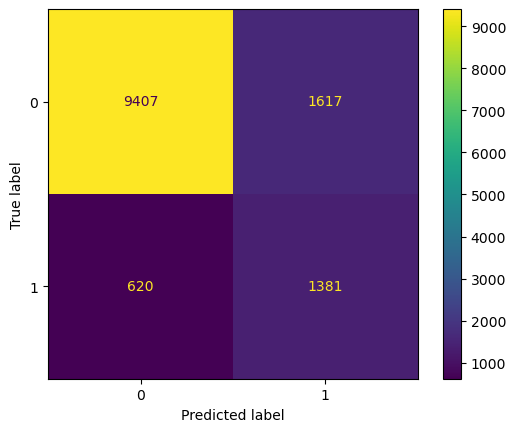

In [235]:
from sklearn.metrics import ConfusionMatrixDisplay
cd = ConfusionMatrixDisplay(cm)
cd.plot()
plt.show()